<a href="https://colab.research.google.com/github/AdityaJaiswal14/Market_Segmentation/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
| yummy   | convenient   | spicy   | fattening   | greasy   | fast   | cheap   | tasty   | expensive   | healthy   | disgusting   | Like   | Age   | VisitFrequency     | Gender   |
|:--------|:-------------|:--------|:------------|:---------|:-------|:--------|:--------|:------------|:----------|:-------------|:-------|:------|:-------------------|:---------|
| No      | Yes          | No      | Yes         | No       | Yes    | Yes     | No      | Yes         | No        | No           | -3     | 61    | Every three months | Female   |
| Yes     | Yes          | No      | Yes         | Yes      | Yes    | Yes     | Yes     | Yes         | No        | No           | +2     | 51    | Every three months | Female   |
| No      | Yes          | Yes     | Yes         | Yes     

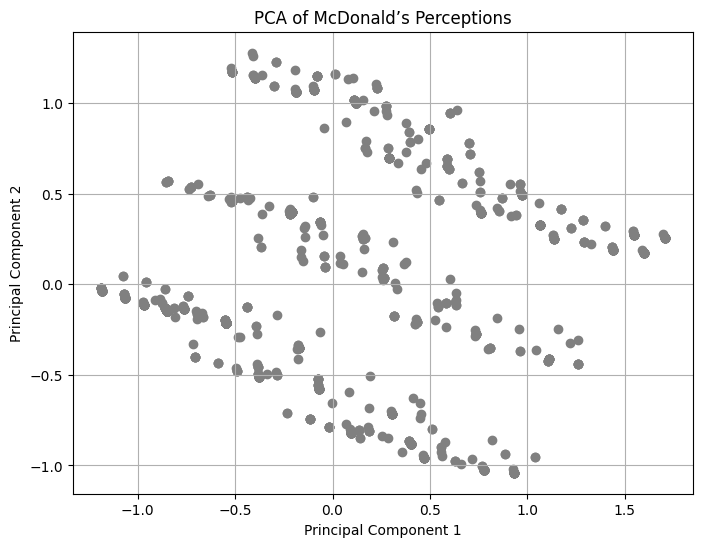

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



K-Means Silhouette Score: 0.2570763207043922


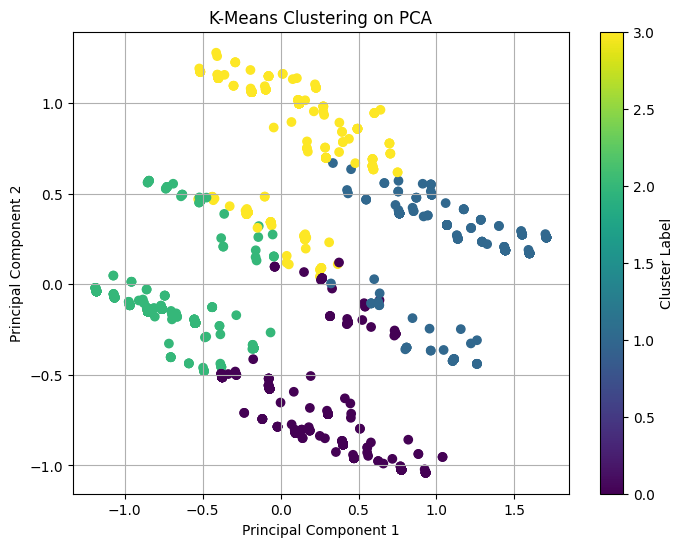

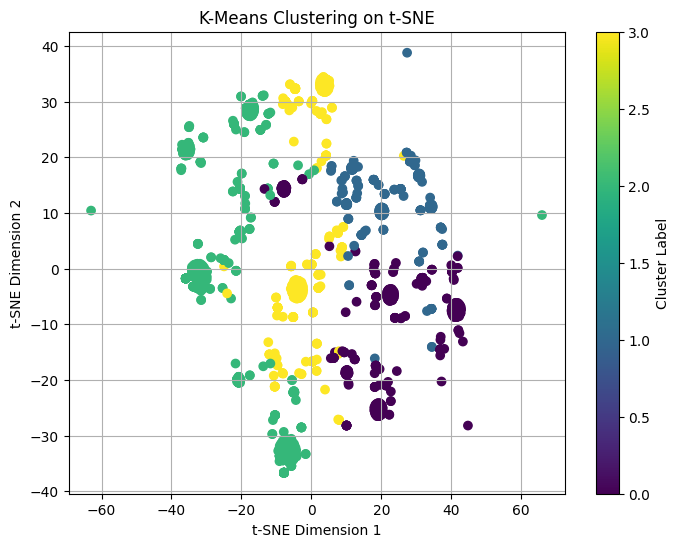

GMM Silhouette Score: 0.23974583707555086
col_0    0    1    2    3
row_0                    
0       99    5  253    7
1        0  211   24    5
2      500    0    0   33
3       22   38    0  256


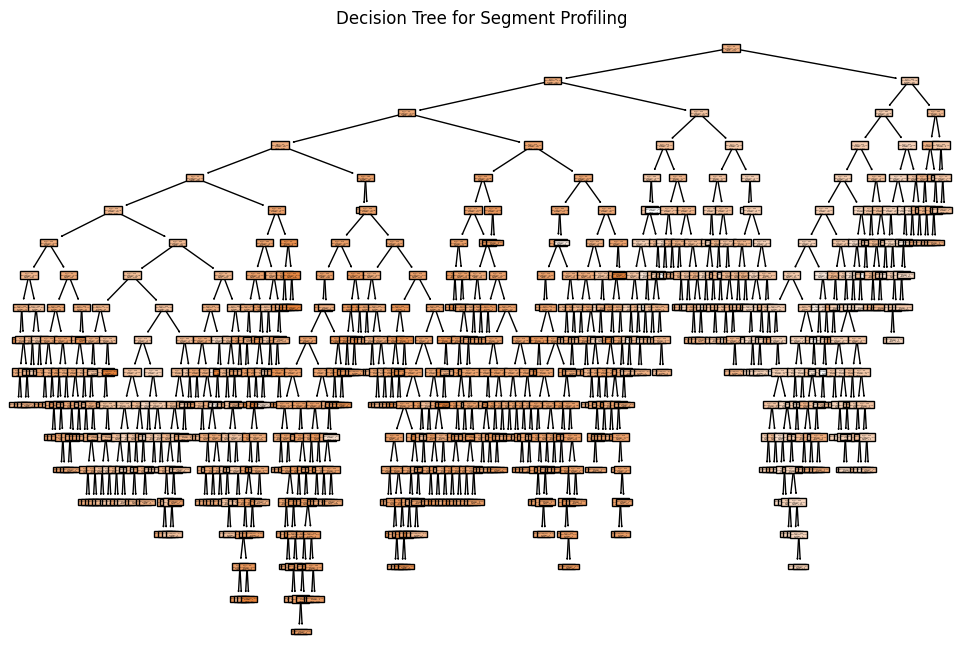

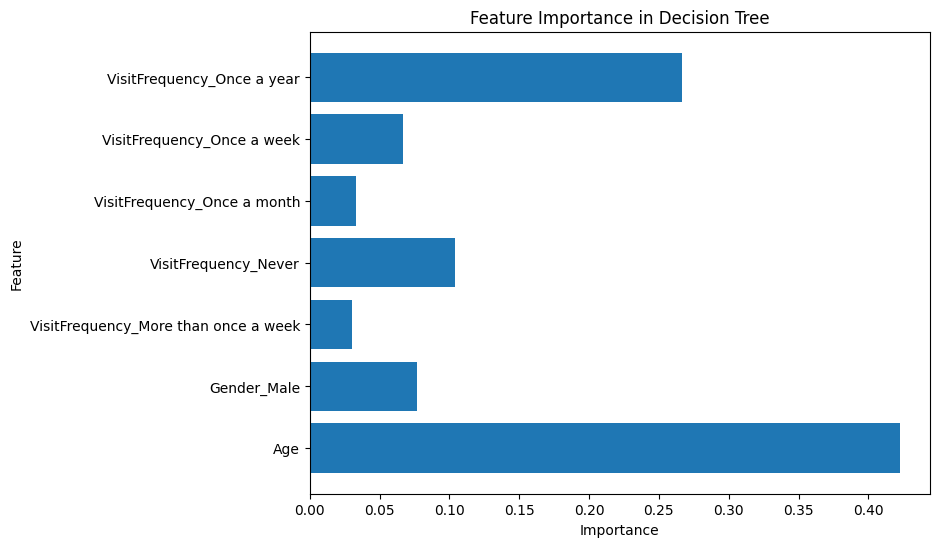

Description of K-Means Clusters:
| KMeans_Segment_Name     | Age     | Like_numeric   | KMeans_Cluster   | GMM_Cluster   |
|:------------------------|:--------|:---------------|:-----------------|:--------------|
| Balanced Customers      | 39.6835 | 1.71417        | 3                | 2.55063       |
| Disinterested Customers | 42.8668 | 2.11706        | 2                | 0.185741      |
| Food Enthusiasts        | 49.1374 | -0.250622      | 0                | 1.46154       |
| Unhappy Customers       | 48.0708 | -0.44071       | 1                | 1.14167       |

Description of GMM Clusters:
| GMM_Cluster   | Age     | Like_numeric   | KMeans_Cluster   | GMM_Cluster   |
|:--------------|:--------|:---------------|:-----------------|:--------------|
| 0             | 43.57   | 1.86211        | 1.71659          | 0             |
| 1             | 48.374  | -0.286987      | 1.27953          | 1             |
| 2             | 49.3574 | -0.516613      | 0.0866426        | 2            

In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import silhouette_score

# Step 1: Load Data
data = pd.read_csv('mcdonalds.csv')

# Step 2: Explore Data
print(data.columns)
print(data.shape)
print(data.head(3).to_markdown(index=False, numalign="left", stralign="left"))

# Step 3: Convert YES/NO to Binary
segmentation_vars = data.iloc[:, :11]  # First 11 columns for segmentation variables
MD_x = (segmentation_vars == "Yes").astype(int).values

# Step 4: PCA for exploring data
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.title('PCA of McDonald\u2019s Perceptions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Step 4.1: t-SNE for Visualization
tsne = TSNE(n_components=2, random_state=1234)
MD_tsne = tsne.fit_transform(MD_x)

# Step 5: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Calculate K-Means Silhouette Score
kmeans_silhouette = silhouette_score(MD_x, clusters)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Plotting K-Means results on PCA
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Plotting K-Means results on t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(MD_tsne[:, 0], MD_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering on t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Step 5.2: Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x)

# Calculate GMM Silhouette Score
gmm_silhouette = silhouette_score(MD_x, gmm_clusters)
print(f"GMM Silhouette Score: {gmm_silhouette}")

# Cross-tabulation of K-Means and GMM clusters
cross_tab = pd.crosstab(clusters, gmm_clusters)
print(cross_tab)

# Step 6: Profiling Segments with Decision Tree Regressor (using 'Like' as dependent variable)
# First, handle 'Like' column conversion and missing values
data['Like_numeric'] = pd.to_numeric(data['Like'], errors='coerce')
data['Like_numeric'] = data['Like_numeric'].fillna(data['Like_numeric'].mean())  # Handle missing values by filling with the mean

# Features (Age, VisitFrequency, Gender) and target (Like_numeric)
X = data[['Age', 'VisitFrequency', 'Gender']]
y = data['Like_numeric']

# Encoding categorical variable 'Gender' and 'VisitFrequency'
X = pd.get_dummies(X, columns=['Gender', 'VisitFrequency'], drop_first=True)

# Use DecisionTreeRegressor instead of DecisionTreeClassifier
tree_model = DecisionTreeRegressor(random_state=1234)
tree_model.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True)
plt.title('Decision Tree for Segment Profiling')
plt.show()

# Visualize Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(X.columns, tree_model.feature_importances_)
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 7: Describing Segments
# Add the cluster labels back to the original data
data['KMeans_Cluster'] = clusters
data['GMM_Cluster'] = gmm_clusters

# Assign descriptive names to segments based on characteristics (example)
segment_names = {
    0: 'Food Enthusiasts',
    1: 'Unhappy Customers',
    2: 'Disinterested Customers',
    3: 'Balanced Customers'
}
data['KMeans_Segment_Name'] = data['KMeans_Cluster'].map(segment_names)

# Describing segments based on K-Means clusters
# Only keep numeric columns for aggregation
numeric_columns = data.select_dtypes(include=[np.number]).columns
kmeans_description = data.groupby('KMeans_Segment_Name')[numeric_columns].mean()
print("Description of K-Means Clusters:")
print(kmeans_description.to_markdown(numalign="left", stralign="left"))

# Describing segments based on GMM clusters
gmm_description = data.groupby('GMM_Cluster')[numeric_columns].mean()
print("\nDescription of GMM Clusters:")
print(gmm_description.to_markdown(numalign="left", stralign="left"))

# Step 8: Selecting Target Segment(s)
# Example: Choosing KMeans_Cluster with the highest satisfaction score ('Like_numeric')
target_segment = kmeans_description[kmeans_description['Like_numeric'] == kmeans_description['Like_numeric'].max()]
print("\nTarget Segment based on satisfaction:")
print(target_segment.to_markdown(numalign="left", stralign="left"))

# Step 9: Customizing the Marketing Mix (with tailored recommendations)
print("\nCustomizing the Marketing Mix for Each Segment:")
for segment_name, segment_data in kmeans_description.iterrows():
    print(f"\nSegment: {segment_name}")
    if segment_name == 'Food Enthusiasts':
        print("  - Product: Introduce premium menu items, focus on flavor and quality.")
        print("  - Price: Consider slightly higher prices to reflect the premium offerings.")
        print("  - Place: Target areas with high foot traffic and a vibrant food scene.")
        print("  - Promotion: Emphasize taste, quality, and new product launches.")
    elif segment_name == 'Convenience Seekers':
        print("  - Product: Expand mobile ordering and delivery options.")
        print("  - Price: Offer combo deals and value menus.")
        print("  - Place: Focus on convenient locations near workplaces and transit hubs.")
        print("  - Promotion: Highlight speed, convenience, and mobile app features.")
    # Add similar recommendations for other segments based on their characteristics

# Step 10: Evaluation and Monitoring
print("\nEvaluation and Monitoring:")
print("KPI 1: Track the sales increase in the target segment post-marketing campaign.")
print("KPI 2: Measure improvement in 'Like' scores in follow-up surveys.")
print("KPI 3: Calculate the return on marketing investment (ROMI) after implementation.")